In [1]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
from ggplot import *
import seaborn as sns
import scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn

C:\Users\tulsi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [37]:
df1 = pd.read_csv('Teacher_Mindfulness_Audio_Transcript_Features_20230214.csv')

In [140]:
df1.head()

,ID,Total_Duration,Teacher_Duration,Student_Duration,Percent_Time_Teacher,Average_Speaker_Duration,Average_Teacher_Duration,Average_Student_Duration,Total_Word_Count,Teacher_Word_Count,...,Flatness_Min,Flatness_Std,Zero_Crossing_Rate_Mean,Zero_Crossing_Rate_Max,Zero_Crossing_Rate_Min,Zero_Crossing_Rate_Std,Loudness_Mean,Loudness_Max,Loudness_Min,Loudness_Std
0,332,308.563991,141,167.563991,0.456955,9.075411,8.294118,9.856705,697,305,...,1.480000e-06,0.101342,0.106655,0.724121,0.0,0.111820,-41.060013,-12.580391,-92.580391,19.036415
1,348,309.289320,86,223.289320,0.278057,6.580624,3.739130,9.303722,698,195,...,2.170000e-06,0.168635,0.102524,0.819824,0.0,0.115759,-43.753429,-14.232292,-94.232292,21.297735
2,335,313.918662,145,168.918662,0.461903,6.975970,6.590909,7.344290,1021,567,...,5.490000e-07,0.140694,0.100872,0.642578,0.0,0.102428,-41.438087,-12.843327,-92.843323,23.901451
3,320,308.307982,180,128.307982,0.583832,5.817132,6.923077,4.752147,651,407,...,1.150000e-06,0.134986,0.113569,0.738281,0.0,0.117673,-43.237362,-16.844372,-96.844376,19.977518
4,328,315.305329,202,113.305329,0.640649,7.332682,9.619048,5.150242,856,637,...,8.890000e-07,0.107515,0.101777,0.606445,0.0,0.098971,-42.857697,-16.831387,-96.831390,18.386736


## EDA

### Transcript Data by Speaker Type

In [133]:
total = df1[['ID', 'Total_Duration', 'Average_Speaker_Duration', 'Total_Word_Count', 'Total_Word_Rate', 'Total_Speaker_Line_Count']]
total = total.rename(columns={'Total_Duration': 'Duration',
                      'Average_Speaker_Duration': 'Avg_Duration', 
                      'Total_Word_Count': 'Word_Count', 
                      'Total_Word_Rate': 'Word_Rate', 
                      'Total_Speaker_Line_Count': 'Line_Count'})
total['Speaker_Type'] = 'Total'
total.head()

,ID,Duration,Avg_Duration,Word_Count,Word_Rate,Line_Count,Speaker_Type
0,332,308.563991,9.075411,697,2.258851,34,Total
1,348,309.289320,6.580624,698,2.256787,47,Total
2,335,313.918662,6.975970,1021,3.252435,45,Total
3,320,308.307982,5.817132,651,2.111525,53,Total
4,328,315.305329,7.332682,856,2.714829,43,Total


In [134]:
teacher = df1[['ID', 'Teacher_Duration', 'Percent_Time_Teacher', 'Average_Teacher_Duration', 'Teacher_Word_Count', 'Teacher_Percent_Words', 'Teacher_Word_Rate', 'Teacher_Line_Count']]
teacher = teacher.rename(columns={'Teacher_Duration': 'Duration', 
                                  'Percent_Time_Teacher': 'Percent_Time',
                                  'Average_Teacher_Duration': 'Avg_Duration', 
                                  'Teacher_Word_Count': 'Word_Count', 
                                  'Teacher_Percent_Words': 'Percent_Words', 
                                  'Teacher_Word_Rate': 'Word_Rate', 
                                  'Teacher_Line_Count': 'Line_Count'})
teacher['Speaker_Type'] = 'Teacher'
teacher.head()

,ID,Duration,Percent_Time,Avg_Duration,Word_Count,Percent_Words,Word_Rate,Line_Count,Speaker_Type
0,332,141,0.456955,8.294118,305,0.437590,2.163121,17,Teacher
1,348,86,0.278057,3.739130,195,0.279370,2.267442,23,Teacher
2,335,145,0.461903,6.590909,567,0.555338,3.910345,22,Teacher
3,320,180,0.583832,6.923077,407,0.625192,2.261111,26,Teacher
4,328,202,0.640649,9.619048,637,0.744159,3.153465,21,Teacher


In [135]:
student = df1[['ID', 'Student_Duration', 'Average_Student_Duration', 'Student_Word_Count', 'Student_Word_Rate', 'Student_Line_Count']]
student = student.rename(columns={'Student_Duration': 'Duration',
                                  'Average_Student_Duration': 'Avg_Duration', 
                                  'Student_Word_Count': 'Word_Count', 
                                  'Student_Word_Rate': 'Word_Rate', 
                                  'Student_Line_Count': 'Line_Count'})
student['Speaker_Type'] = 'Student'
student.head()

,ID,Duration,Avg_Duration,Word_Count,Word_Rate,Line_Count,Speaker_Type
0,332,167.563991,9.856705,392,2.339405,17,Student
1,348,223.289320,9.303722,503,2.252683,24,Student
2,335,168.918662,7.344290,454,2.687684,23,Student
3,320,128.307982,4.752147,244,1.901674,27,Student
4,328,113.305329,5.150242,219,1.932831,22,Student


In [212]:
transcript_data = pd.concat([total, teacher, student], axis=0).reset_index()
transcript_data.head()

,index,ID,Duration,Avg_Duration,Word_Count,Word_Rate,Line_Count,Speaker_Type,Percent_Time,Percent_Words
0,0,332,308.563991,9.075411,697,2.258851,34,Total,NaN,NaN
1,1,348,309.289320,6.580624,698,2.256787,47,Total,NaN,NaN
2,2,335,313.918662,6.975970,1021,3.252435,45,Total,NaN,NaN
3,3,320,308.307982,5.817132,651,2.111525,53,Total,NaN,NaN
4,4,328,315.305329,7.332682,856,2.714829,43,Total,NaN,NaN


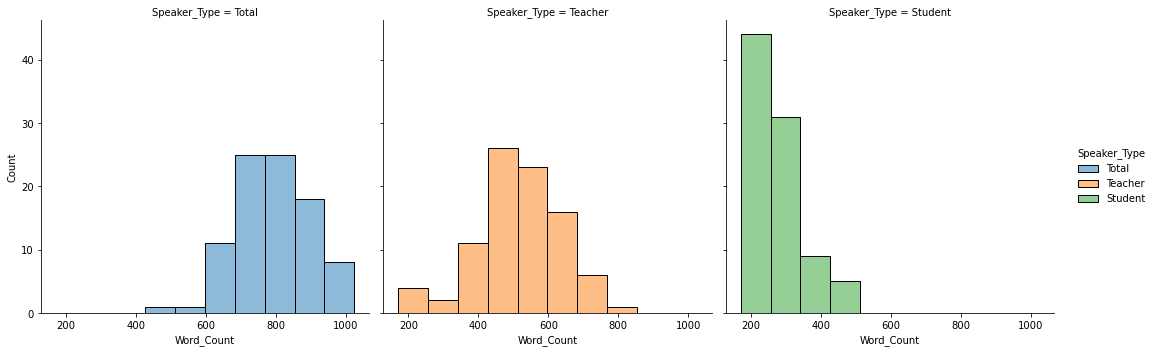

In [146]:
sns.displot(data=transcript_data, x="Word_Count", hue='Speaker_Type', col='Speaker_Type')

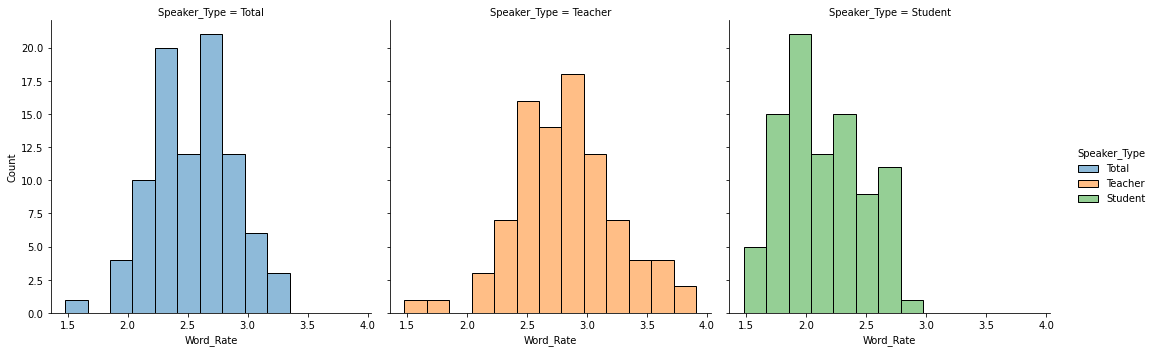

In [147]:
sns.displot(data=transcript_data, x="Word_Rate", hue='Speaker_Type', col='Speaker_Type')

### Audio Only

In [177]:
audio_data = df1[['ID', 'number_ of_syllables', 'number_of_pauses', 'rate_of_speech', 'articulation_rate', 'speaking_duration', 'original_duration', 'balance',
                 'f0_mean', 'Mood', 'MFCC_1_Mean', 'MFCC_2_Mean', 'MFCC_3_Mean', 'MFCC_4_Mean', 'MFCC_5_Mean', 'MFCC_6_Mean', 'MFCC_7_Mean', 'MFCC_8_Mean', 
                  'MFCC_9_Mean', 'MFCC_10_Mean', 'MFCC_11_Mean', 'MFCC_12_Mean', 'MFCC_13_Mean', 'RMS_Mean', 'Centroid_Mean', 'Bandwidth_Mean', 'Flatness_Mean', 
                  'Zero_Crossing_Rate_Mean', 'Loudness_Mean']]
audio_data.head()

,ID,number_ of_syllables,number_of_pauses,rate_of_speech,articulation_rate,speaking_duration,original_duration,balance,f0_mean,Mood,...,MFCC_10_Mean,MFCC_11_Mean,MFCC_12_Mean,MFCC_13_Mean,RMS_Mean,Centroid_Mean,Bandwidth_Mean,Flatness_Mean,Zero_Crossing_Rate_Mean,Loudness_Mean
0,332,411,62,3.0,4,93.5,144.6,0.6,211.67,Reading,...,-13.183566,0.719455,-1.359205,2.892683,0.029641,1786.920458,1637.887678,0.019112,0.106655,-41.060013
1,348,255,39,3.0,5,50.5,86.0,0.6,244.32,speaking passionately,...,0.335741,2.010402,-11.104792,-2.374372,0.027384,1880.643307,1741.747397,0.038517,0.102524,-43.753429
2,335,427,87,3.0,5,87.3,141.0,0.6,239.45,speaking passionately,...,-5.123688,-7.457674,-6.685852,-0.191224,0.042522,2111.406850,1892.126906,0.030195,0.100872,-41.438087
3,320,483,87,3.0,4,108.2,180.0,0.6,218.64,Reading,...,-2.904614,9.073298,-8.873303,-4.542405,0.025647,1904.362888,1710.442369,0.029412,0.113569,-43.237362
4,328,614,105,3.0,5,130.7,202.0,0.6,148.77,speaking passionately,...,-5.010119,-2.679964,-9.820412,-0.450276,0.022262,1715.910697,1614.815366,0.020410,0.101777,-42.857697


In [211]:
# audio_data.isnull().any()

<AxesSubplot:xlabel='number_of_pauses', ylabel='Count'>

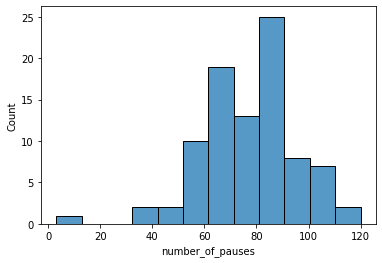

In [181]:
sns.histplot(data=audio_data, x="number_of_pauses")

<AxesSubplot:xlabel='number_of_pauses', ylabel='Mood'>

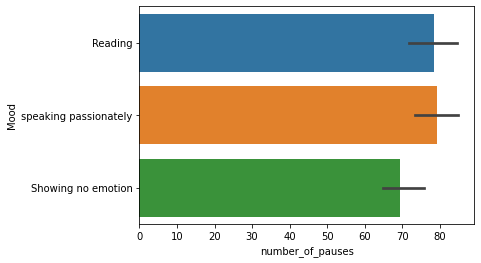

In [182]:
sns.barplot(data=audio_data, x="number_of_pauses", y="Mood")

<AxesSubplot:xlabel='speaking_duration', ylabel='Count'>

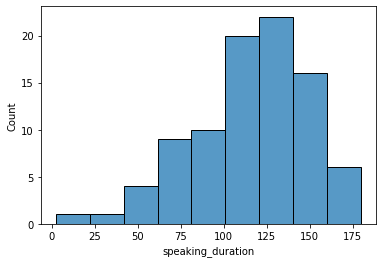

In [189]:
sns.histplot(data=audio_data, x="speaking_duration")

### Survey Data

In [164]:
demo = pd.read_csv('survey data.csv').drop('Unnamed: 0', axis = 1).rename(columns={'studyid': 'ID'})

In [165]:
demo.head()

,ID,mindfulness,Race,Gender,firstgenedu,efficacy,perceived_overall_stress,burnout,anticipatory_stress,ever_practiced_mindfulness,perceived_sim_stress,emotional_labor,mod_intense_exercise,high_intense_exercise,caffeine_use,tobacco_use,alcohol_use
0,201,1,4.0,0.0,NaN,4.4,5.4,4.25,6.00,1.0,5.50,3.181818,1.0,0.0,0.0,0.0,NaN
1,202,0,1.0,0.0,NaN,4.6,2.0,1.00,2.25,1.0,3.25,2.909091,1.0,1.0,1.0,0.0,NaN
2,203,1,1.0,0.0,NaN,3.6,4.0,3.25,4.75,1.0,3.75,3.909091,0.0,0.0,1.0,0.0,NaN
3,204,0,6.0,0.0,NaN,3.6,2.8,4.00,3.50,NaN,3.50,3.545455,2.0,1.0,1.0,0.0,NaN
4,205,1,1.0,0.0,NaN,3.4,4.4,5.75,3.75,0.0,3.50,3.454545,0.0,1.0,0.0,0.0,0.0


In [23]:
demo_cols = demo[['efficacy', 'perceived_overall_stress', 'burnout', 'anticipatory_stress', 'ever_practiced_mindfulness',
                  'perceived_sim_stress', 'emotional_labor']]

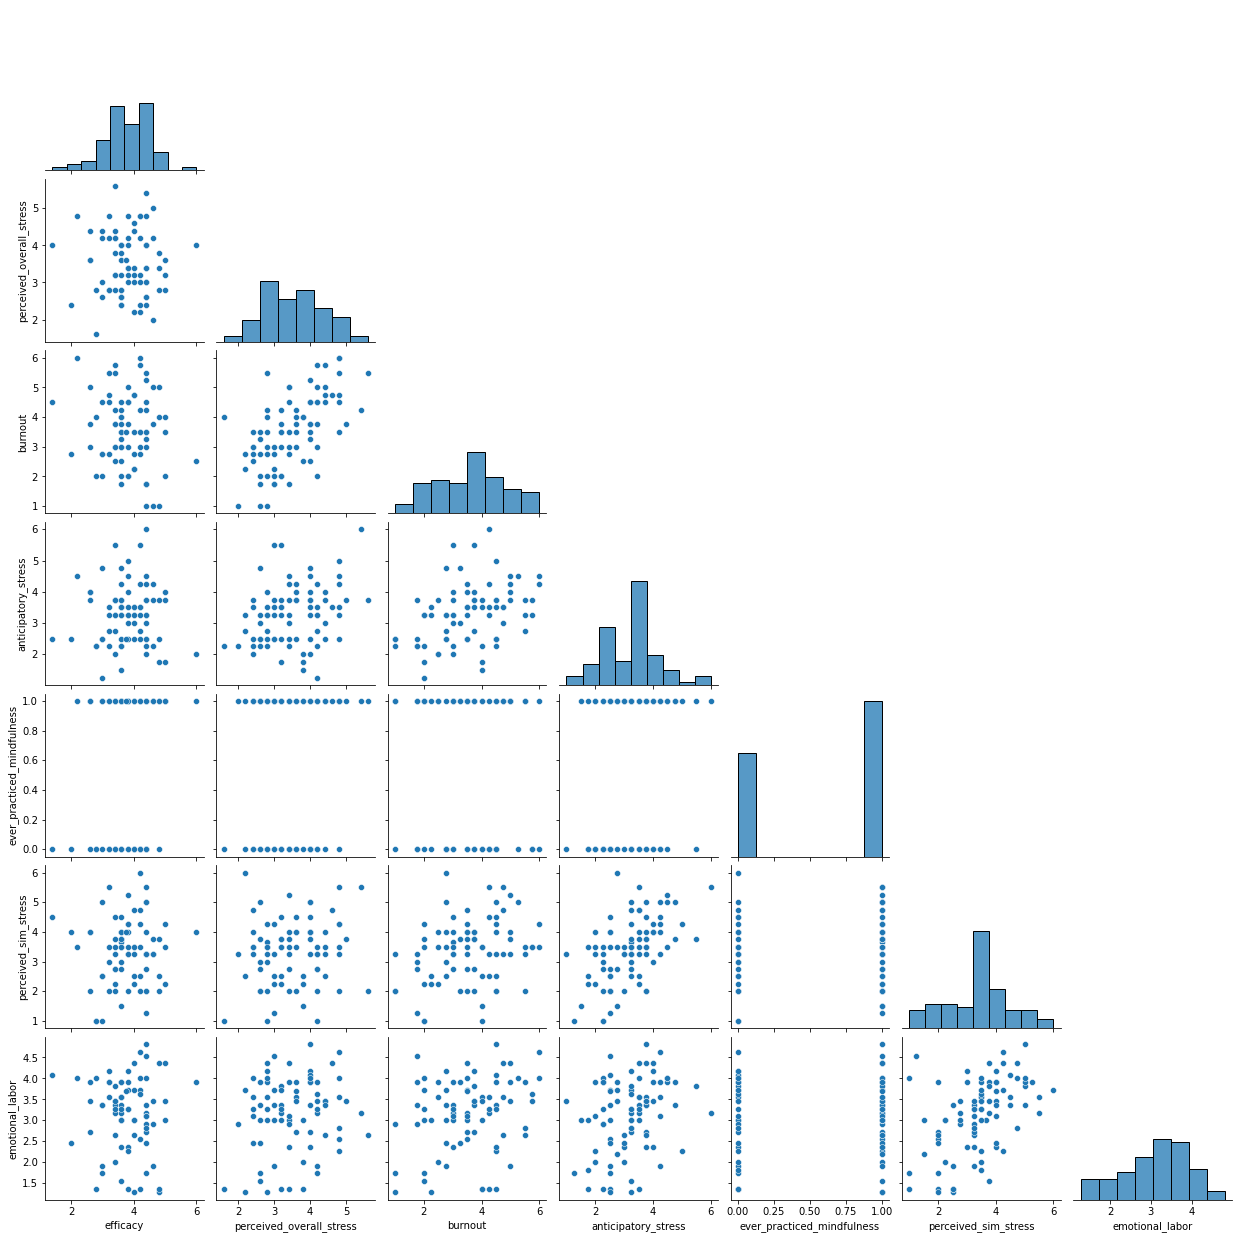

In [24]:
sns.pairplot(demo_cols, corner=True)

### Merged Transcription & Survey data

In [168]:
trans_merged = pd.merge(transcript_data, demo, how='left')

In [213]:
trans_merged.head()

,index,ID,Duration,Avg_Duration,Word_Count,Word_Rate,Line_Count,Speaker_Type,Percent_Time,Percent_Words,...,burnout,anticipatory_stress,ever_practiced_mindfulness,perceived_sim_stress,emotional_labor,mod_intense_exercise,high_intense_exercise,caffeine_use,tobacco_use,alcohol_use
0,0,332,308.563991,9.075411,697,2.258851,34,Total,NaN,NaN,...,3.50,2.50,0.0,3.50,3.727273,1.0,1.0,1.0,0.0,NaN
1,1,348,309.289320,6.580624,698,2.256787,47,Total,NaN,NaN,...,5.00,4.25,1.0,3.25,1.909091,1.0,0.0,0.0,0.0,NaN
2,2,335,313.918662,6.975970,1021,3.252435,45,Total,NaN,NaN,...,4.50,3.50,NaN,3.25,3.272727,0.0,0.0,0.0,0.0,1.0
3,3,320,308.307982,5.817132,651,2.111525,53,Total,NaN,NaN,...,3.75,4.00,0.0,4.00,4.181818,1.0,0.0,1.0,0.0,NaN
4,4,328,315.305329,7.332682,856,2.714829,43,Total,NaN,NaN,...,2.75,2.50,0.0,4.00,2.454545,0.0,0.0,1.0,0.0,NaN


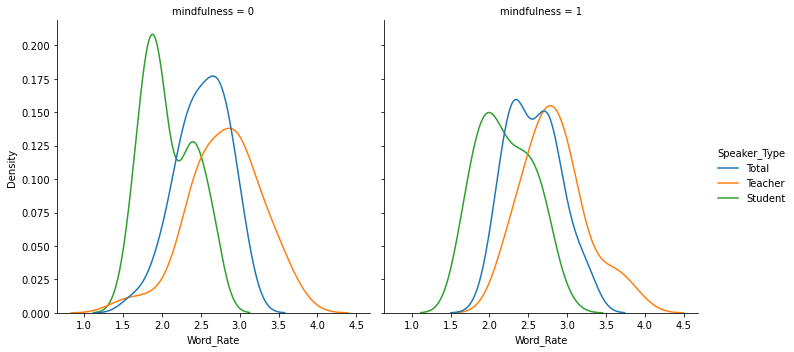

In [173]:
sns.displot(data=trans_merged, x="Word_Rate", hue="Speaker_Type", col="mindfulness", kind='kde')

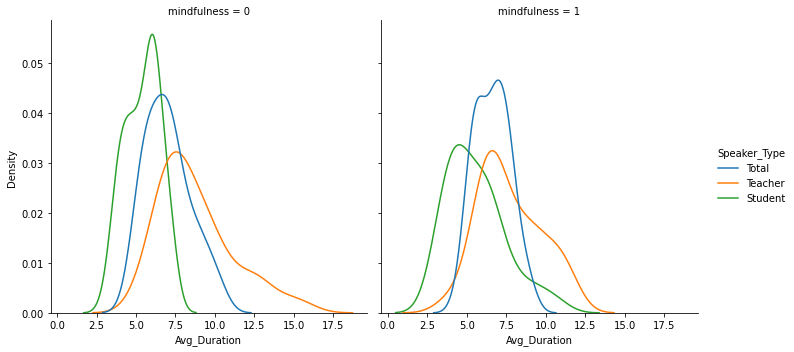

In [174]:
sns.displot(data=trans_merged, x="Avg_Duration", hue="Speaker_Type", col="mindfulness", kind='kde')

### Merged Audio & Survey Data

In [190]:
audio_merged = pd.merge(audio_data, demo, how='left')

In [191]:
audio_merged.head()

,ID,number_ of_syllables,number_of_pauses,rate_of_speech,articulation_rate,speaking_duration,original_duration,balance,f0_mean,Mood,...,burnout,anticipatory_stress,ever_practiced_mindfulness,perceived_sim_stress,emotional_labor,mod_intense_exercise,high_intense_exercise,caffeine_use,tobacco_use,alcohol_use
0,332,411,62,3.0,4,93.5,144.6,0.6,211.67,Reading,...,3.50,2.50,0.0,3.50,3.727273,1.0,1.0,1.0,0.0,NaN
1,348,255,39,3.0,5,50.5,86.0,0.6,244.32,speaking passionately,...,5.00,4.25,1.0,3.25,1.909091,1.0,0.0,0.0,0.0,NaN
2,335,427,87,3.0,5,87.3,141.0,0.6,239.45,speaking passionately,...,4.50,3.50,NaN,3.25,3.272727,0.0,0.0,0.0,0.0,1.0
3,320,483,87,3.0,4,108.2,180.0,0.6,218.64,Reading,...,3.75,4.00,0.0,4.00,4.181818,1.0,0.0,1.0,0.0,NaN
4,328,614,105,3.0,5,130.7,202.0,0.6,148.77,speaking passionately,...,2.75,2.50,0.0,4.00,2.454545,0.0,0.0,1.0,0.0,NaN


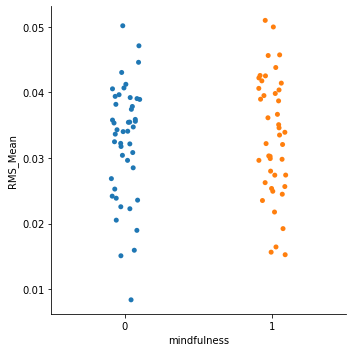

In [194]:
sns.catplot(data=audio_merged, x="mindfulness", y="RMS_Mean")

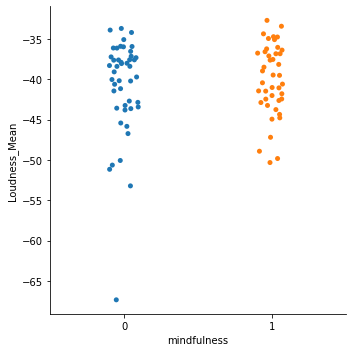

In [195]:
sns.catplot(data=audio_merged, x="mindfulness", y="Loudness_Mean")

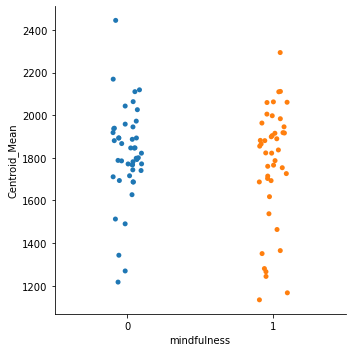

In [210]:
sns.catplot(data=audio_merged, x="mindfulness", y="Centroid_Mean")

### Full Data & Survey Data Merged

In [200]:
df_merged = pd.merge(df1, demo, on='ID')
# df_merged = df_merged.drop('studyid', axis=1)
df_merged.head()

,ID,Total_Duration,Teacher_Duration,Student_Duration,Percent_Time_Teacher,Average_Speaker_Duration,Average_Teacher_Duration,Average_Student_Duration,Total_Word_Count,Teacher_Word_Count,...,burnout,anticipatory_stress,ever_practiced_mindfulness,perceived_sim_stress,emotional_labor,mod_intense_exercise,high_intense_exercise,caffeine_use,tobacco_use,alcohol_use
0,332,308.563991,141,167.563991,0.456955,9.075411,8.294118,9.856705,697,305,...,3.50,2.50,0.0,3.50,3.727273,1.0,1.0,1.0,0.0,NaN
1,348,309.289320,86,223.289320,0.278057,6.580624,3.739130,9.303722,698,195,...,5.00,4.25,1.0,3.25,1.909091,1.0,0.0,0.0,0.0,NaN
2,335,313.918662,145,168.918662,0.461903,6.975970,6.590909,7.344290,1021,567,...,4.50,3.50,NaN,3.25,3.272727,0.0,0.0,0.0,0.0,1.0
3,320,308.307982,180,128.307982,0.583832,5.817132,6.923077,4.752147,651,407,...,3.75,4.00,0.0,4.00,4.181818,1.0,0.0,1.0,0.0,NaN
4,328,315.305329,202,113.305329,0.640649,7.332682,9.619048,5.150242,856,637,...,2.75,2.50,0.0,4.00,2.454545,0.0,0.0,1.0,0.0,NaN


In [202]:
df_merged_reduced = merged[['ID', 'Total_Duration', 'Teacher_Duration', 'Student_Duration', 'Percent_Time_Teacher', 'Average_Speaker_Duration',
                         'Average_Teacher_Duration', 'Average_Student_Duration', 'Total_Word_Count', 'Teacher_Word_Count', 'Student_Word_Count',
                         'Teacher_Percent_Words', 'Total_Word_Rate', 'Teacher_Word_Rate', 'Student_Word_Rate', 'Total_Speaker_Line_Count', 
                         'Teacher_Line_Count', 'Student_Line_Count', 'number_ of_syllables', 'number_of_pauses', 'rate_of_speech', 'articulation_rate',
                         'speaking_duration', 'original_duration', 'balance', 'f0_mean', 'Mood', 'RMS_Mean', 'Centroid_Mean', 'Bandwidth_Mean', 'Flatness_Mean',
                         'Zero_Crossing_Rate_Mean', 'Loudness_Mean', 'mindfulness', 'Race', 'Gender', 'firstgenedu', 'efficacy', 'perceived_overall_stress',
                         'burnout', 'anticipatory_stress', 'ever_practiced_mindfulness', 'perceived_sim_stress', 'emotional_labor', 'mod_intense_exercise', 
                         'high_intense_exercise', 'caffeine_use', 'tobacco_use', 'alcohol_use']]

In [203]:
df_merged_reduced.head()

,ID,Total_Duration,Teacher_Duration,Student_Duration,Percent_Time_Teacher,Average_Speaker_Duration,Average_Teacher_Duration,Average_Student_Duration,Total_Word_Count,Teacher_Word_Count,...,burnout,anticipatory_stress,ever_practiced_mindfulness,perceived_sim_stress,emotional_labor,mod_intense_exercise,high_intense_exercise,caffeine_use,tobacco_use,alcohol_use
0,332,308.563991,141,167.563991,0.456955,9.075411,8.294118,9.856705,697,305,...,3.50,2.50,0.0,3.50,3.727273,1.0,1.0,1.0,0.0,NaN
1,348,309.289320,86,223.289320,0.278057,6.580624,3.739130,9.303722,698,195,...,5.00,4.25,1.0,3.25,1.909091,1.0,0.0,0.0,0.0,NaN
2,335,313.918662,145,168.918662,0.461903,6.975970,6.590909,7.344290,1021,567,...,4.50,3.50,NaN,3.25,3.272727,0.0,0.0,0.0,0.0,1.0
3,320,308.307982,180,128.307982,0.583832,5.817132,6.923077,4.752147,651,407,...,3.75,4.00,0.0,4.00,4.181818,1.0,0.0,1.0,0.0,NaN
4,328,315.305329,202,113.305329,0.640649,7.332682,9.619048,5.150242,856,637,...,2.75,2.50,0.0,4.00,2.454545,0.0,0.0,1.0,0.0,NaN


C:\Users\tulsi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


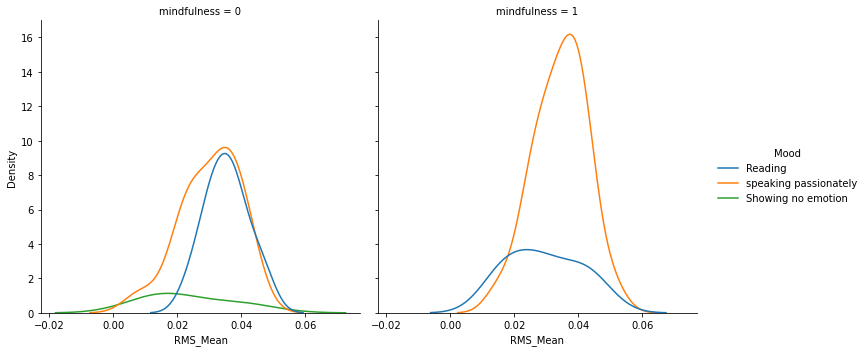

In [215]:
sns.displot(data=df_merged_reduced, x="RMS_Mean", hue="Mood", col="mindfulness", kind='kde')

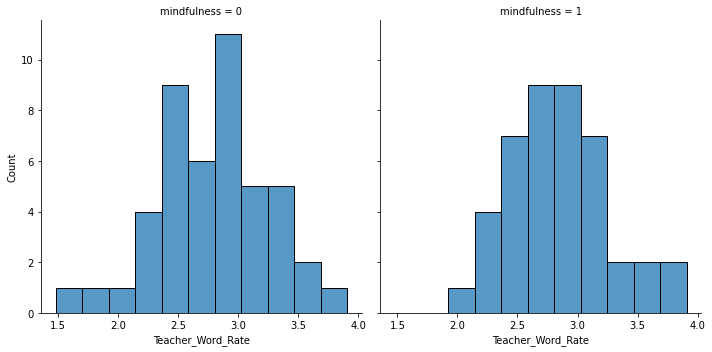

In [216]:
sns.displot(data=df_merged_reduced, x="Teacher_Word_Rate", col="mindfulness")

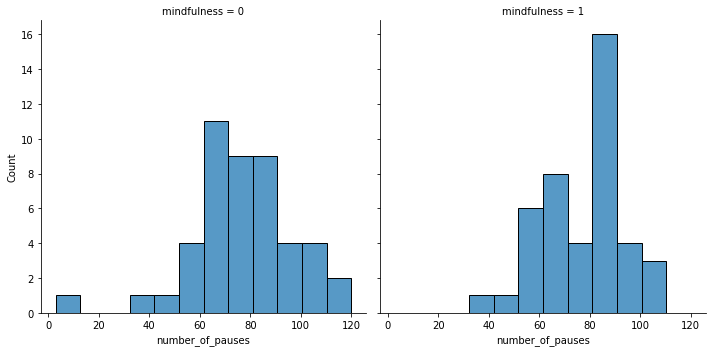

In [217]:
sns.displot(data=df_merged_reduced, x="number_of_pauses", col="mindfulness")